In [32]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import  metrics

In [33]:
col_names = ['Pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("diabetes.csv", header=0, names=col_names)


In [34]:
data.head()

,Pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
feature_cols = ['Pregnancies', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = data[feature_cols]
y = data.label



In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [37]:

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:\n", cm)


TN, FP, FN, TP = cm.ravel()
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Confusion Matrix:
 [[109  37]
 [ 41  44]]
True Negative (TN): 109
False Positive (FP): 37
False Negative (FN): 41
True Positive (TP): 44


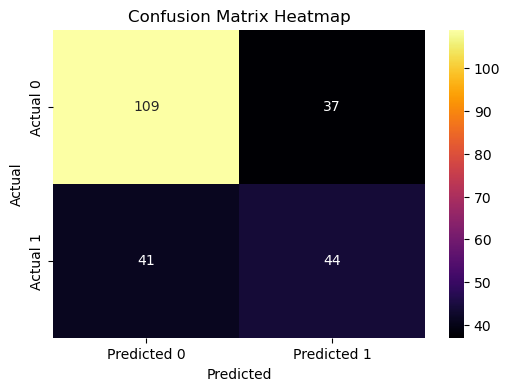

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=["Predicted 0","Predicted 1"], yticklabels=["Actual 0","Actual 1"] )
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [42]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.5432098765432098


In [43]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.5176470588235295


In [44]:
print("F1_Score:",metrics.f1_score(y_test, y_pred))

F1_Score: 0.5301204819277108


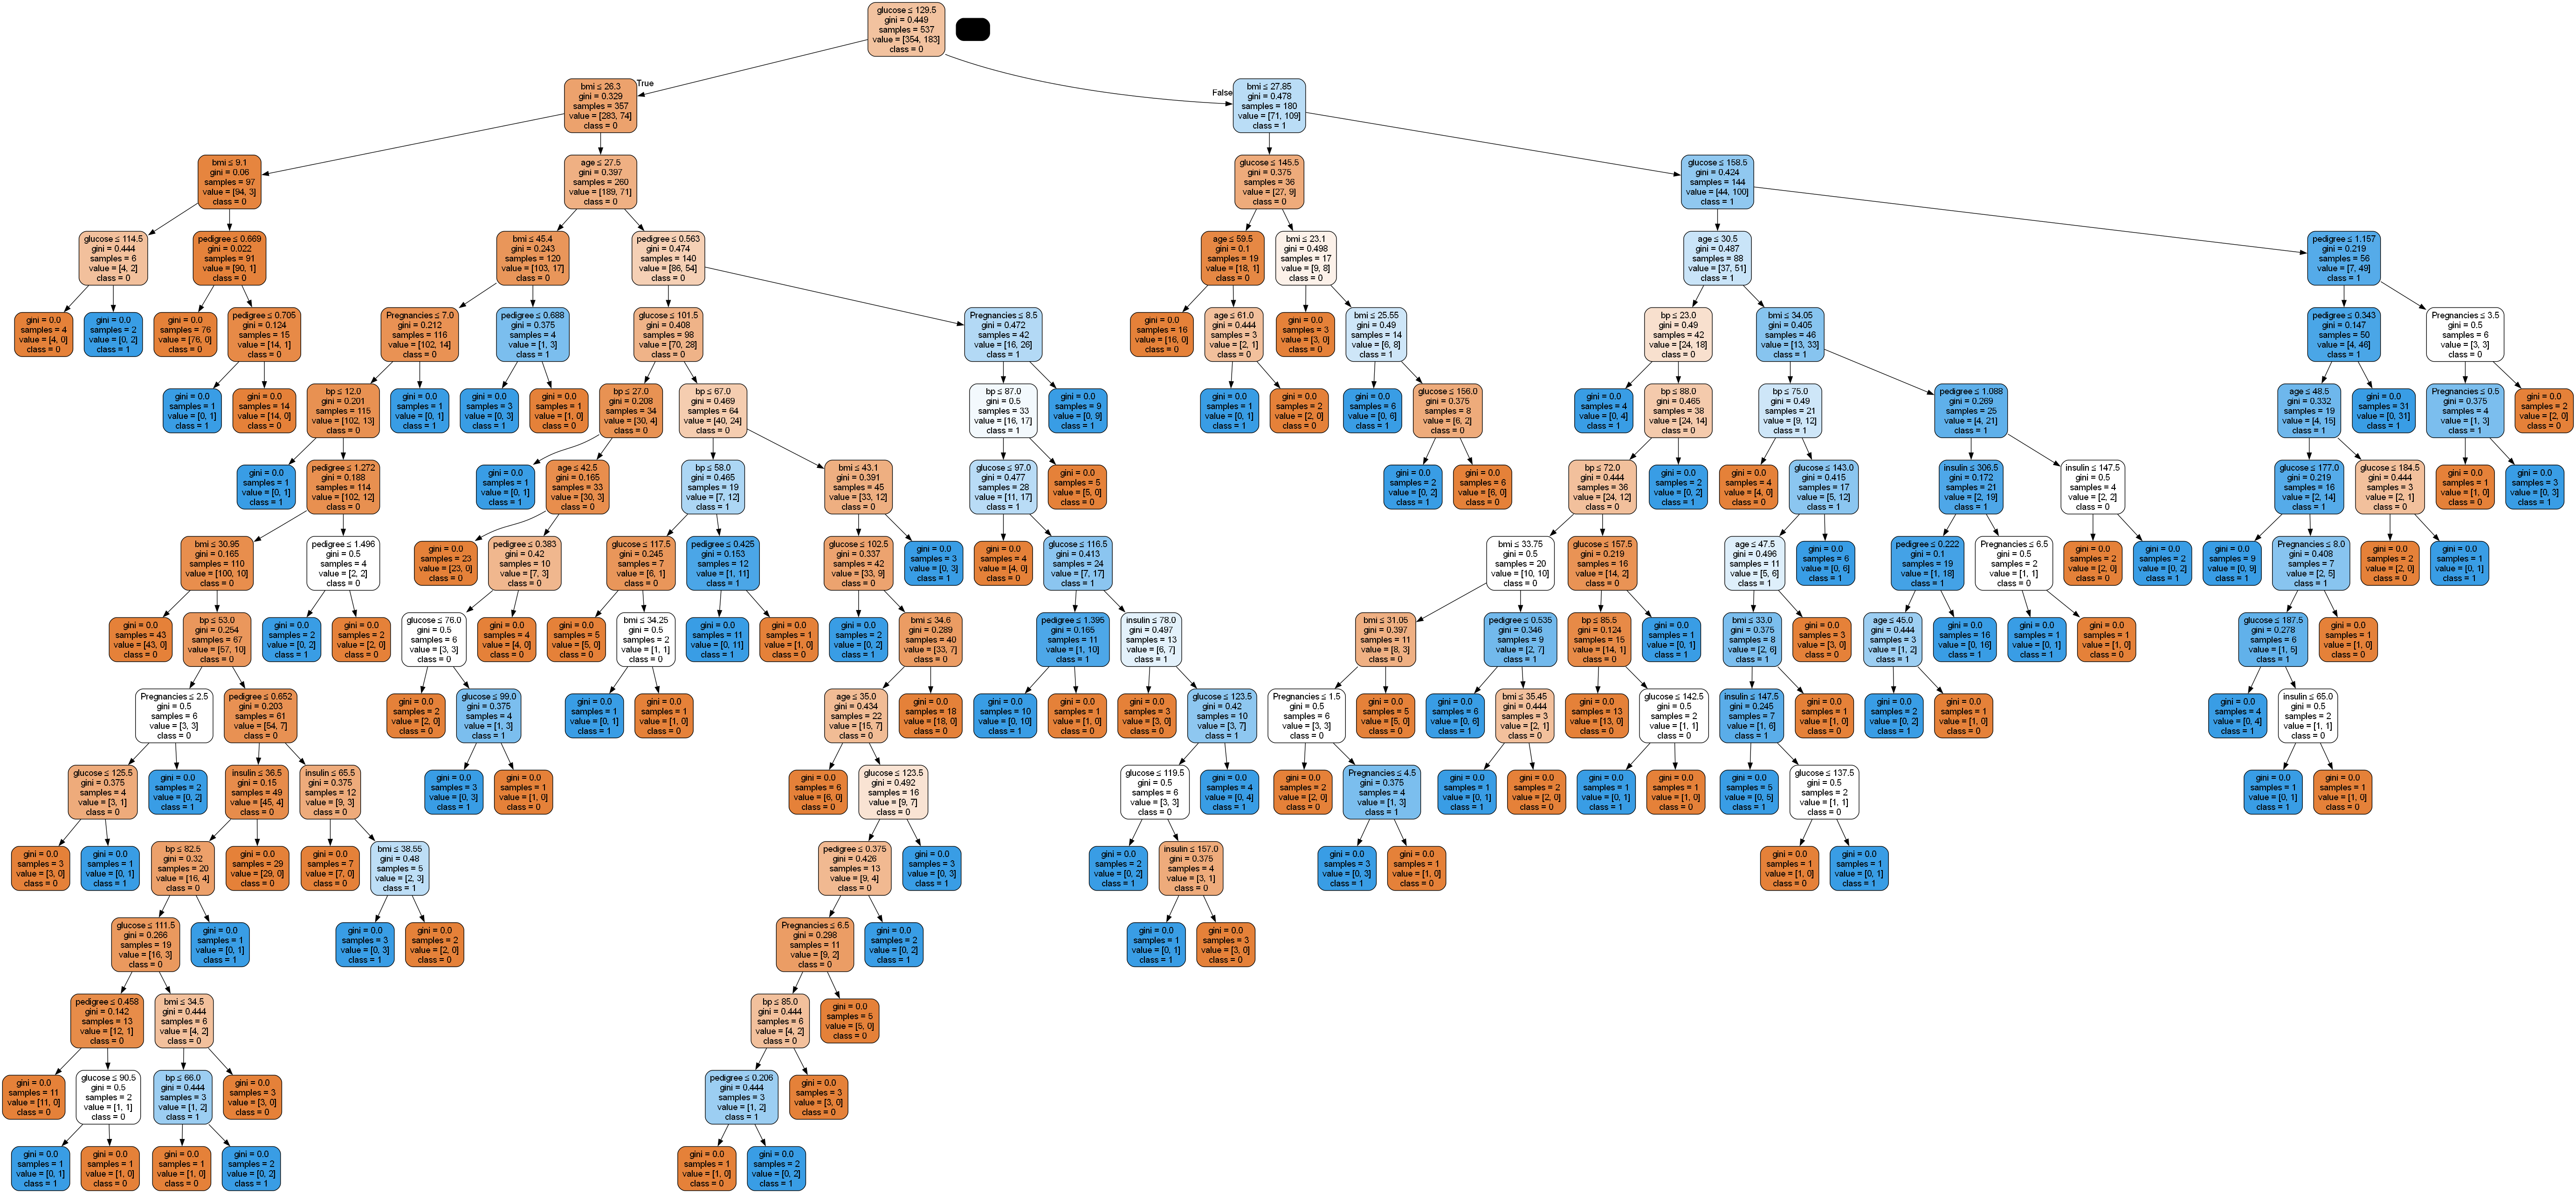

In [45]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png())


In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


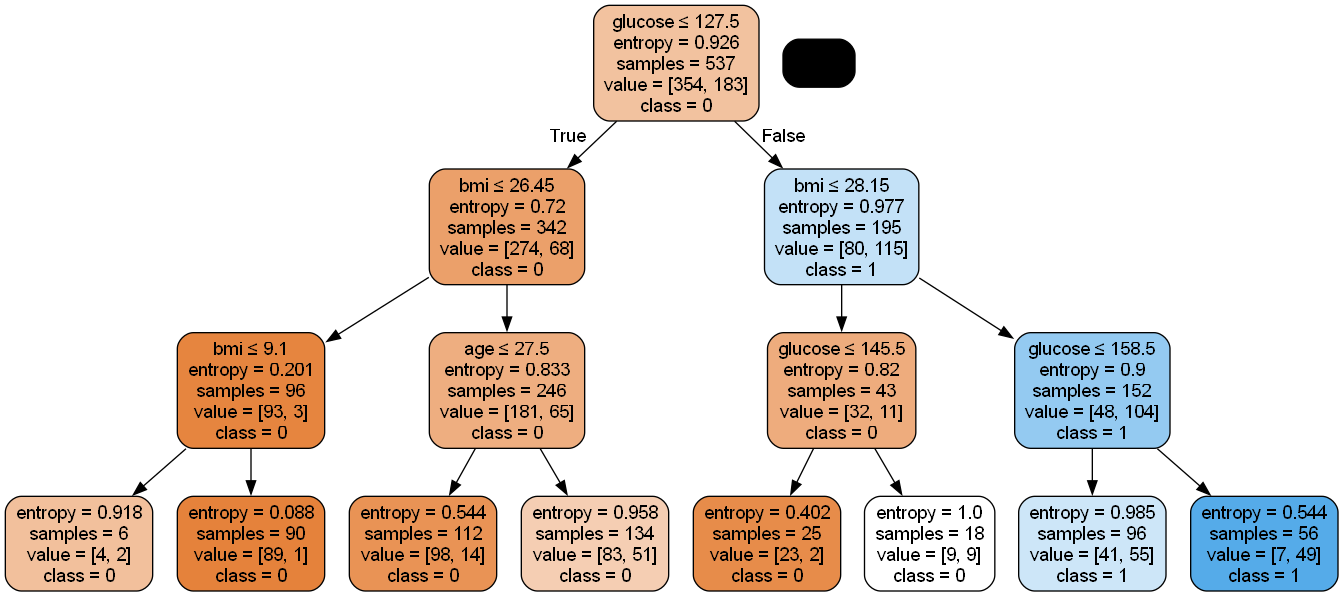

In [47]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')

Image(graph.create_png())


In [48]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy : 0.7705627705627706
Precision: 0.7105263157894737
Recall: 0.6352941176470588
F1_Score: 0.6708074534161491
